# Connect to the service and get the data

In [4]:
import requests
import pandas as pd
from pprint import pprint

# API endpoint
url = "https://data.rothamsted.ac.uk/api/3/action/datastore_search"
params = {
    "resource_id": "bc242a9c-8662-4ce0-829e-00787afef1ea"
}

# Query the API
response = requests.get(url, params=params)
data = response.json()

# Check if the request was successful
if data.get('success'):
    print("Success!!")
else:
    print("Failed to fetch data from the API")

Success!!


In [5]:
pprint(data)

{'help': 'https://data.rothamsted.ac.uk/api/3/action/help_show?name=datastore_search',
 'result': {'_links': {'next': '/api/3/action/datastore_search?resource_id=bc242a9c-8662-4ce0-829e-00787afef1ea&offset=100',
                       'start': '/api/3/action/datastore_search?resource_id=bc242a9c-8662-4ce0-829e-00787afef1ea'},
            'fields': [{'id': '_id', 'type': 'int'},
                       {'id': 'Official tag', 'type': 'text'},
                       {'id': 'Farmlet', 'type': 'text'},
                       {'id': 'Breed', 'type': 'text'},
                       {'id': 'Sex', 'type': 'text'},
                       {'id': 'Date of birth', 'type': 'timestamp'},
                       {'id': 'Timepoint', 'type': 'text'},
                       {'id': 'Measurement_date', 'type': 'timestamp'},
                       {'id': 'Hair_cortisol', 'type': 'text'},
                       {'id': 'Nasal_swab_cortisol', 'type': 'text'},
                       {'id': 'Hair_serotonin', 'type

# Convert to dataframe and display the first few rows of the dataframe

In [6]:
records = data['result']['records']
# Load the records into a DataFrame
df = pd.DataFrame(records)
print(df.head())

   _id      Official tag Farmlet Breed Sex        Date of birth Timepoint  \
0    1  UK 362735 302064   Green    ST   F  2020-01-26T00:00:00  Winter 1   
1    2  UK 362735 302064   Green    ST   F  2020-01-26T00:00:00  Winter 2   
2    3  UK 362735 302064   Green    ST   F  2020-01-26T00:00:00  Summer 1   
3    4  UK 362735 302064   Green    ST   F  2020-01-26T00:00:00  Summer 2   
4    5  UK 362735 602067   Brown    ST   M  2020-02-07T00:00:00  Winter 1   

      Measurement_date Hair_cortisol Nasal_swab_cortisol  ...  \
0  2020-11-06T00:00:00   3.140567468         3.248217758  ...   
1  2021-02-16T00:00:00   1.347002429          5.00331825  ...   
2  2021-05-12T00:00:00     5.7358466          8.10245614  ...   
3  2021-06-20T00:00:00    5.58487285         1.653105968  ...   
4  2020-11-06T00:00:00   3.986744052         2.528415301  ...   

  Swellings_head_neck Swellings_body Swellings_front_legs Swellings_back_legs  \
0                   0              0                    0        

# Run some summary stats

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where BCS is NA
df['BCS'] = pd.to_numeric(df['BCS'], errors='coerce')
df = df.dropna(subset=['BCS'])

df_stats = df.groupby(['Farmlet', 'Timepoint'])['BCS'].agg(['mean', 'std']).reset_index()
print(df_stats)

  Farmlet Timepoint      mean       std
0   Brown  Summer 1  3.615385  0.767948
1   Brown  Summer 2  5.000000  0.000000
2   Brown  Winter 1  3.000000  0.000000
3   Brown  Winter 2  3.000000  0.000000
4   Green  Summer 1  3.090909  0.700649
5   Green  Summer 2  4.600000  0.516398
6   Green  Winter 1  3.000000  0.000000
7   Green  Winter 2  2.909091  0.301511


# Plot the mean data, showing deviation 

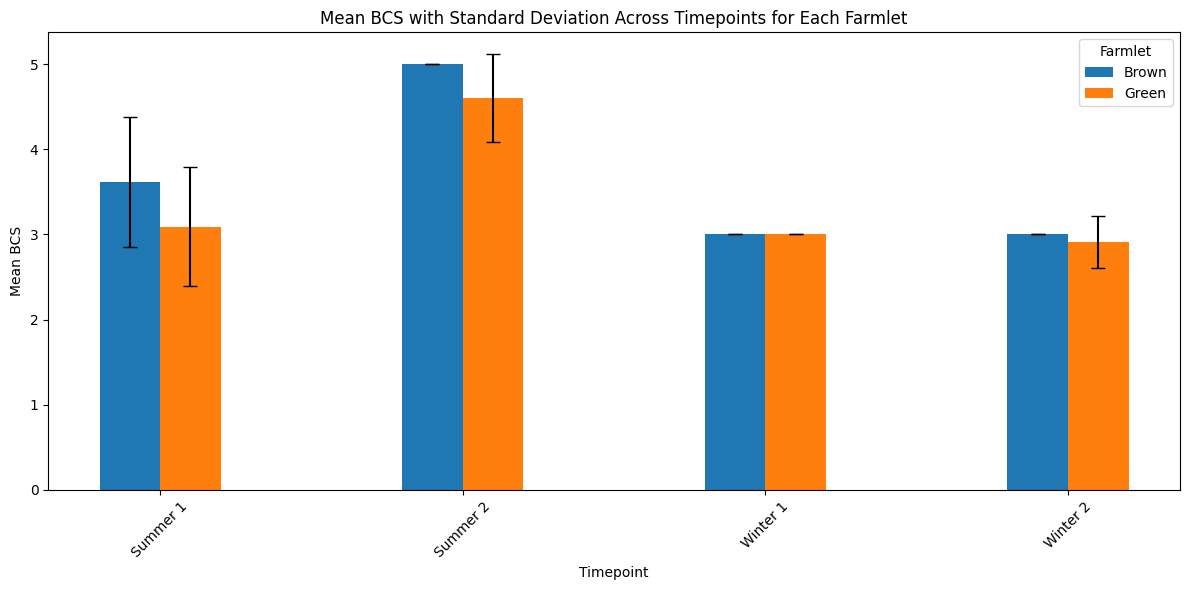

In [8]:
# Get unique values for Timepoints and Farmlets
timepoints = df_stats['Timepoint'].unique()
farmlets = df_stats['Farmlet'].unique()

# Define the width of each bar and set up positions for grouped bars
bar_width = 0.2
x = np.arange(len(timepoints))  # label locations for each time point

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop over each Farmlet and plot bars with error bars at slightly offset positions
for i, farmlet in enumerate(farmlets):
    # Filter data for the current farmlet
    farmlet_data = df_stats[df_stats['Farmlet'] == farmlet]
    
    # Plot bars with error bars for standard deviation
    ax.bar(
        x + i * bar_width, 
        farmlet_data['mean'], 
        width=bar_width, 
        yerr=farmlet_data['std'], 
        capsize=5, 
        label=farmlet
    )

# Customize the plot
ax.set_title('Mean BCS with Standard Deviation Across Timepoints for Each Farmlet')
ax.set_xlabel('Timepoint')
ax.set_ylabel('Mean BCS')
ax.set_xticks(x + bar_width * (len(farmlets) - 1) / 2)
ax.set_xticklabels(timepoints, rotation=45)
ax.legend(title='Farmlet')
plt.tight_layout()

plt.show()